In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(123)

In [2]:
X = np.arange(15, dtype=float).T
y = np.arange(15, dtype=float)

#X = np.array([13, 8, 11, 2, 6], dtype=float).T
#y = np.array([3, 6, 7, 8, 11], dtype=float)

X = np.stack((np.ones(X.shape[0]), X), axis=1)

noise = np.random.normal(0.4, 0.6, y.shape)
y += noise

In [3]:
print(X)
print(y)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]]
[-0.25137836  1.99840727  2.5697871   2.49622317  4.05283985  6.39086192
  4.94399245  7.14265242  9.15956176  8.87995576  9.99266831 11.34317462
 13.29483378 13.0166588  14.13361082]


In [4]:
lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)

In [5]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

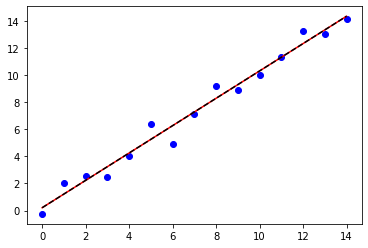

In [8]:
plt.scatter(X[:,1], y, c='blue')
plt.plot(X[:,1], X @ w, c='r')
plt.plot(X[:,1], y_hat, c='black', linestyle='dashed')